Olá, Renan!

Meu nome é Luiz. Fico feliz em revisar seu projeto. Ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender o meu feedback no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítico, mas que pode ser corrigido para melhoria geral no seu código/análise.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser arrumado, caso contrário seu projeto **não** será aceito.
</div>

Você pode interagir comigo através dessa célula:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>


# Project Description

## Initializing

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import t
from scipy.stats import ttest_ind
from scipy.stats import levene



<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

As bibliotecas foram importadas corretamente, mas tente não deixar espaços em branco entre as linhas.
</div>

## Loading Files

In [7]:
# reading files

try:
    hypotheses = pd.read_csv("/datasets/hypotheses_us.csv")

except FileNotFoundError:
    hypotheses = pd.read_csv("hypotheses_us.csv", sep=';')

In [8]:
# reading files

try:
    orders = pd.read_csv("/datasets/orders_us.csv")

except FileNotFoundError:
    orders = pd.read_csv("orders_us.csv")

In [9]:
# reading files

try:
    visits = pd.read_csv("/datasets/visits_us.csv")

except FileNotFoundError:
    visits = pd.read_csv("visits_us.csv")

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Os arquivos foram carregados, porém há um problema com o dataset de hipóteses que menciono logo abaixo. Muito bom tratamento de execeção em caso de arquivo não encontrado.
</div>

In [11]:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [12]:
hypotheses.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Aqui você deve conseguir importar esse dataset no formato esperado usando outro tipo de separador:
  
```python
pd.read_csv(..., sep=';')
```
   
</div>

In [14]:
# lowering cases on 'hypotheses' columns

hypotheses.columns = hypotheses.columns.str.lower()

In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [16]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [17]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [18]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


    No missing values were found 

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Os métodos `info()` e `head()` foram usados corretamente para estudar previamente os conjuntos de dados.
</div>

## Modifying and standaryzing data

In [22]:
# modyfing 'date' column to date format

visits['date'] = pd.to_datetime(visits['date'])

In [23]:
# modyfing 'date' column to date format

orders['date'] = pd.to_datetime(orders['date'])

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Os atributos do tipo `date` foram convertidos para o formato adequado.
</div>

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Você deve conseguir importar esse dataset no formato esperado como sugeri acima.
   
</div>


<div class="alert alert-block alert-info">
<b>Tinha esquecido desse recurso, obrigado.</b> <a class="tocSkip"></a>
</div>


# Data Analysis

## Prioritizing Hypothesis

In [29]:
hypotheses.head(10)

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


### ICE

In [31]:
hypotheses['ICE'] = (hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']

In [32]:
hypotheses.sort_values(by='ICE', ascending=False).head(10)

,hypothesis,reach,impact,confidence,effort,ICE
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000
5,Add a customer review page. This will increase...,3,2,2,3,1.333333
3,Change the category structure. This will incre...,8,3,3,8,1.125000
4,Change the background color on the main page. ...,3,1,1,1,1.000000


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O cálculo da métrica `ICE` foi feito corretamente.
   
</div>

### RICE

In [35]:
hypotheses['RICE'] = (hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']

In [36]:
hypotheses.sort_values(by='RICE', ascending=False).head(10)

,hypothesis,reach,impact,confidence,effort,ICE,RICE
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


The ICE prioritization was sorted on 1st data frame by ICE which is 'Impact', 'Confidence' and 'Effort'. 
'Hypothesis 9' has great score for 'impact' and 'confidence' a medium score for 'effort'.
'Hypothesis 1' has an excellent score for 'impact' great score for 'confidence' and a medium score for 'effort'. When we look at the 3rd best score for ICE. 'hypothesis 8' we see a good score for confidence and impact and a medium score for effort.
At the bottom of the data frame we see very poor score for 'hypothesis 5'.

The RICE prioritization was sorted on 2nd data frame by RICE which is 'Reach', 'Impact', 'Confidence' and 'Effort'. 
'Hypothesis 8' now feature the top when taking a excellent score for 'reach' in consideration.
'Hypothesis 3' comes from 5th in ICE prioritization to 2nd when taking 'reach' in consideration.
'Hypothesis 1' has dropped one position in prioritization when taking its poor score for reach but it still feature the top 3.
'Hypothesis 5' still at the bottom with a poor score for reach.

Looking at the way some 'hypothesis' have shifted positions when taken reach in consideration, we still see 'hypothesis 8' and 'hypothesis 1' on top 3, I would recommend  testing number 8 and number 1.



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O cálculo da métrica `RICE` foi feito corretamente e os resultados foram interpretados, ordenando pelas hipóteses com maior impacto usando as métricas calculadas previamente.
   
</div>

## A/B Testing

#### 1. Faça um gráfico da receita acumulada por grupo. Tire conclusões e crie conjecturas.

In [71]:
# filtering data per group A

revenue_groupA = orders[orders['group'] == 'A'].groupby('group', as_index=False).agg({'revenue' : 'sum'})

In [73]:
revenue_groupA.head()

,group,revenue
0,A,64554.9


In [43]:
# filtering data per group B

revenue_groupB = orders[orders['group'] == 'B'].groupby('group', as_index=False).agg({'revenue' : 'sum'})

In [44]:
revenue_groupB.head()

,group,revenue
0,B,92840.6


In [45]:
# calculating percentage difference between groups

((revenue_groupA['revenue'] - revenue_groupB['revenue']) / revenue_groupA['revenue']) * 100

0   -43.816503
Name: revenue, dtype: float64

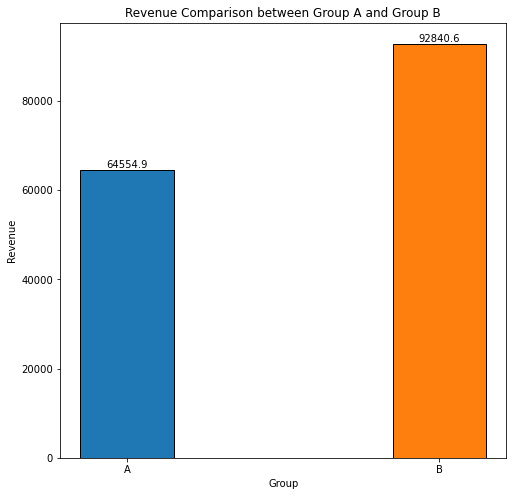

In [46]:
plt.figure(figsize=(8,8))

plt.bar(revenue_groupA['group'], revenue_groupA['revenue'], edgecolor='black', width = 0.3)
plt.bar(revenue_groupB['group'], revenue_groupB['revenue'], edgecolor='black', width = 0.3)

for i, value in enumerate(revenue_groupA['revenue']):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')
for i, value in enumerate(revenue_groupB['revenue']):
    plt.text(i + len(revenue_groupB['group']), value + 0.1, str(value), ha='center', va='bottom')
plt.xlabel('Group')
plt.ylabel('Revenue')
plt.title('Revenue Comparison between Group A and Group B')
plt.show()

    We see at the graphic above that group B has 43% more revenue in comparison with Group A

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O cálculo de receita acumulada por grupo foi feito corretamente. Como sugestão, poderia anotar o gráfico com o valor da receita, usar barras menores e tirar as grades de fundo da figura.
   
</div>

#### 2. Faça um gráfico do tamanho médio acumulado do pedido por grupo. Tire conclusões e crie conjecturas.

In [50]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [51]:
# grouping orders count per day group A

transactions_groupA = orders[orders['group'] == 'A'].groupby('group').agg(orders_count=('transactionId', 'size')).reset_index()

In [52]:
# grouping orders count per day group B

transactions_groupB = orders[orders['group'] == 'B'].groupby('group').agg(orders_count=('transactionId', 'size')).reset_index()

In [53]:
# merging orders and revenue

orders_revenue_groupA = transactions_groupA.merge(revenue_groupA, on='group')

In [54]:
# adding avg_order_value on group A

orders_revenue_groupA['avg_order_value'] = (orders_revenue_groupA['revenue'] / orders_revenue_groupA['orders_count']).round(2)

In [55]:
# merging orders and revenue

orders_revenue_groupB = transactions_groupB.merge(revenue_groupB, on='group')

In [56]:
# adding avg_order_value on group B

orders_revenue_groupB['avg_order_value'] = (orders_revenue_groupB['revenue'] / orders_revenue_groupB['orders_count']).round(2)

In [57]:
orders_revenue_groupA

,group,orders_count,revenue,avg_order_value
0,A,557,64554.9,115.9


    Average order revenue for Group A is €115.90

In [59]:
orders_revenue_groupB

,group,orders_count,revenue,avg_order_value
0,B,640,92840.6,145.06


In [60]:
((orders_revenue_groupA['avg_order_value'] - orders_revenue_groupB['avg_order_value']) /  orders_revenue_groupA['avg_order_value']) * 100

0   -25.15962
Name: avg_order_value, dtype: float64

In [61]:
((orders_revenue_groupA['orders_count'] - orders_revenue_groupB['orders_count']) / orders_revenue_groupA['orders_count']) * 100

0   -14.901257
Name: orders_count, dtype: float64

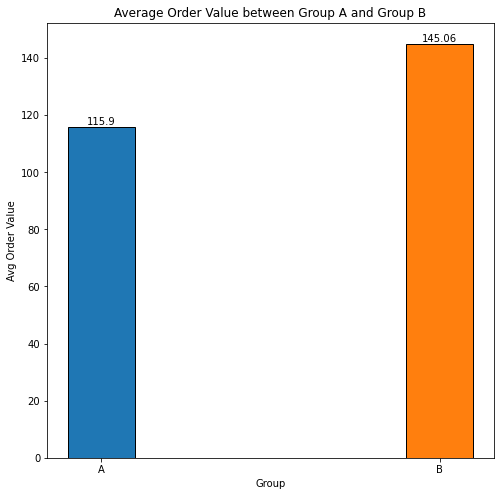

In [62]:
plt.figure(figsize=(8,8))
plt.bar(orders_revenue_groupA['group'], orders_revenue_groupA['avg_order_value'], edgecolor='black', width=0.2)
plt.bar(orders_revenue_groupB['group'], orders_revenue_groupB['avg_order_value'], edgecolor='black', width=0.2)
for i, value in enumerate(orders_revenue_groupA['avg_order_value']):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')
for i, value in enumerate(orders_revenue_groupB['avg_order_value']):
    plt.text(i + len(orders_revenue_groupB['group']), value + 0.1, str(value), ha='center', va='bottom')
plt.xlabel('Group')
plt.ylabel('Avg Order Value')
plt.title('Average Order Value between Group A and Group B')
plt.show()

    here we see on this graphic that group B has an average order value 25% higher than group A, mostly caused by group B having 14.9% more orders than group A

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Aqui você precisa criar conjecturas e interpretar os resultados obtidos pela análise e não somente mostrar os dados. Além disso, considere apresentar os resultados juntos ao invés de usar um gráfico de barra para mostrar somente uma barra para cada grupo (usar uma tabela, por exemplo).
   
</div>

In [65]:
# creating datesGroups

datesGroups = orders[['date', 'group']].drop_duplicates()

In [66]:
# aggreating orders

ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg(
        {
            'date' : 'max',
            'group' : 'max',
            'transactionId' : pd.Series.nunique,
            'visitorId' : pd.Series.nunique, 
            'revenue' : 'sum'
        }
    ), axis=1
).sort_values(by=['date','group'])


In [67]:
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,2356.8
66,2019-08-01,B,21,20,1620.0
175,2019-08-02,A,44,38,3860.3
173,2019-08-02,B,45,43,4243.8
291,2019-08-03,A,68,62,5675.5


In [68]:
# aggregating visitors

visitorsAggregated = datesGroups.apply(
    lambda x: visits[
    np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date':'max', 'group':'max','visits':'sum'}),axis=1).sort_values(['date','group'])

In [69]:
visitorsAggregated.head()

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [70]:
# merging cumulative data

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date','group'], right_on=['date','group'])

In [71]:
# renaming columns

cumulativeData.columns=['date','group','orders','buyers','revenue','visitors']

In [72]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845


In [73]:
# grouping revenue group A

cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]

In [74]:
cumulativeRevenueA.head()

,date,revenue,orders
0,2019-08-01,2356.8,24
2,2019-08-02,3860.3,44
4,2019-08-03,5675.5,68
6,2019-08-04,6822.1,84
8,2019-08-05,8810.2,109


In [75]:
# grouping revenue B

cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

In [330]:
cumulativeRevenueB.head(20)

,date,revenue,orders
1,2019-08-01,1620.0,21
3,2019-08-02,4243.8,45
5,2019-08-03,6050.6,61
7,2019-08-04,7767.9,78
9,2019-08-05,9262.9,101
11,2019-08-06,13069.3,129
13,2019-08-07,16600.8,153
15,2019-08-08,20088.6,180
17,2019-08-09,22646.7,205
19,2019-08-10,24367.1,228


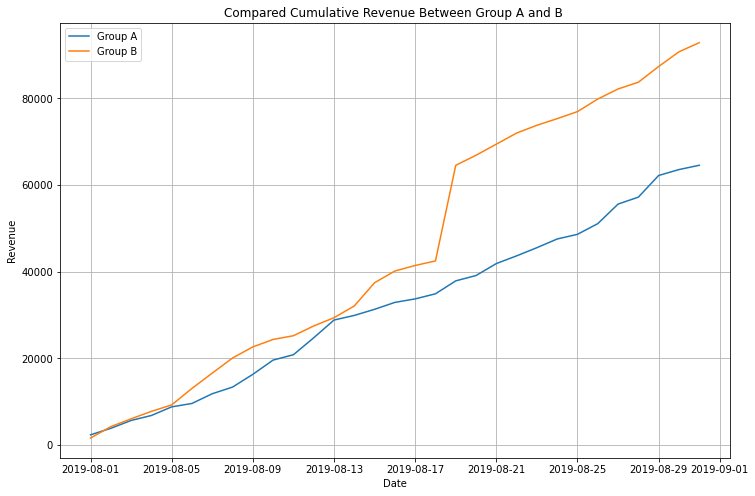

In [77]:
# plotting compared cumulative revenue

plt.figure(figsize=(12,8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Group A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Group B')
plt.title('Compared Cumulative Revenue Between Group A and B ')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(True)
plt.legend()
plt.show()

    The revenue shows a stable growth in sales, there is a spike on group B on the 18th of August. It could be explained by high value orders or high volume orders.
    

#### 3. Faça um gráfico da diferença relativa no tamanho médio acumulado do pedido para o grupo B em comparação com o grupo A. Faça conclusões e crie conjecturas.

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Aqui novamente você precisa interpretar esses resultados e criar conjecturas sobre possíveis razões dessa diferença entre os grupos.
   
</div>

In [81]:
# merging 

mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'],)

In [82]:
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,2356.8,24,1620.0,21
1,2019-08-02,3860.3,44,4243.8,45
2,2019-08-03,5675.5,68,6050.6,61
3,2019-08-04,6822.1,84,7767.9,78
4,2019-08-05,8810.2,109,9262.9,101


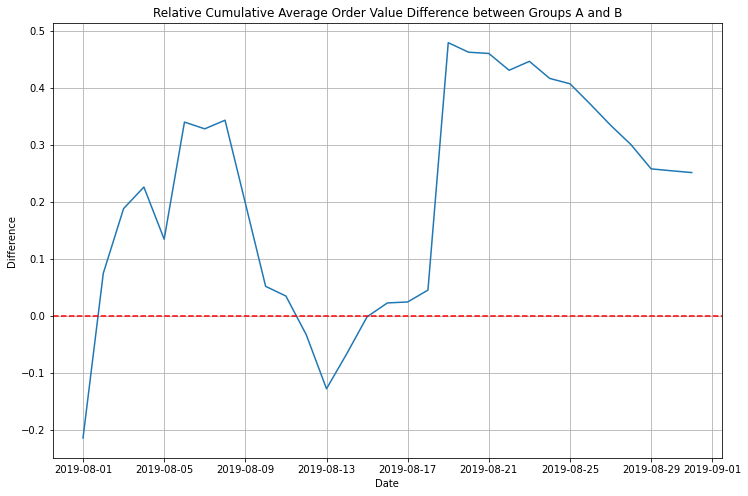

In [83]:
plt.figure(figsize=(12,8))
plt.plot(mergedCumulativeRevenue['date'],(mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB'])
    / (mergedCumulativeRevenue['revenueA']/ mergedCumulativeRevenue['ordersA'])- 1)
plt.title('Relative Cumulative Average Order Value Difference between Groups A and B')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.axhline(y=0, color='red', linestyle='--')
plt.grid(True)
plt.show()

    We can see peak in some segments what could be high value orders or outliers


#### 4. Calcule a taxa de conversão de cada grupo como a proporção de pedidos para o número de visitas para cada dia. Trace as taxas de conversão diárias dos dois grupos e descreva a diferença. Tire conclusões e crie conjecturas.

In [85]:
# filtering group A on revenue per day

revenue_per_day_groupA = orders[orders['group'] == 'A'].groupby('date', as_index=False).agg({'revenue' : 'sum'})

In [86]:
# transforming data type to date format

revenue_per_day_groupA['date'] = pd.to_datetime(revenue_per_day_groupA['date'])

In [87]:
# filtering group B on revenue per day

revenue_per_day_groupB = orders[orders['group'] == 'B'].groupby('date', as_index=False).agg({'revenue' : 'sum'})

In [88]:
# transforming data type to date format

revenue_per_day_groupB['date'] = pd.to_datetime(revenue_per_day_groupB['date'])

In [89]:
# filtering visits per group A

visits_groupA = visits.query('group == "A"')

In [90]:
# filtering visits per group B

visits_groupB = visits.query('group == "B"')

In [91]:
# merging dataFrames from group A

revenue_visits_groupA = revenue_per_day_groupA.merge(visits_groupA, on='date')

In [92]:
orders_per_day_groupA = orders[orders['group'] == 'A'].groupby('date', as_index=False).agg({'transactionId' : 'size'})

In [93]:
# merging transactionId in dataFrame

revenue_visits_groupA = revenue_visits_groupA.merge(orders_per_day_groupA, on='date')

In [94]:
# calculating conversion rate for group A

revenue_visits_groupA['conversion_rate'] = (revenue_visits_groupA['transactionId'] / revenue_visits_groupA['visits']) * 100

In [95]:
revenue_visits_groupA.head()

,date,revenue,group,visits,transactionId,conversion_rate
0,2019-08-01,2356.8,A,719,24,3.337969
1,2019-08-02,1503.5,A,619,20,3.231018
2,2019-08-03,1815.2,A,507,24,4.733728
3,2019-08-04,1146.6,A,717,16,2.231520
4,2019-08-05,1988.1,A,756,25,3.306878


In [96]:
# setting average conversion

average_conversion_rate_groupA = revenue_visits_groupA['conversion_rate'].mean()

In [97]:
revenue_visits_groupA['conversion_rate'].describe()

count    31.000000
mean      3.065067
std       0.989510
min       1.610306
25%       2.316716
50%       2.795031
75%       3.805147
max       5.341880
Name: conversion_rate, dtype: float64

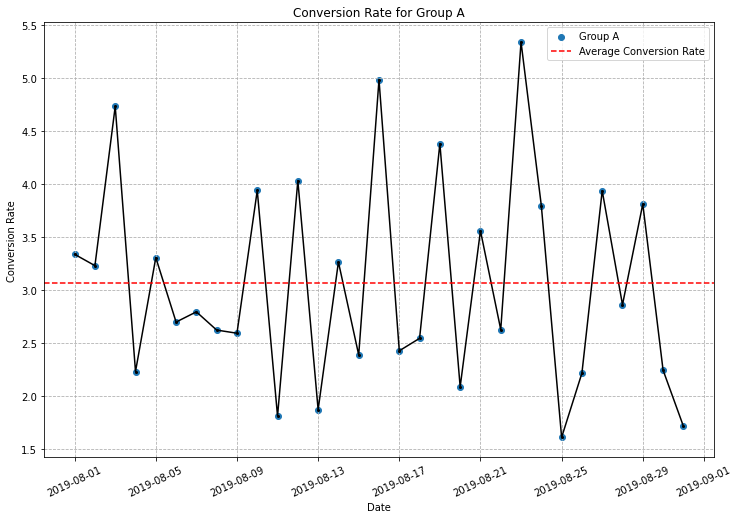

In [98]:
# plotting conversion rate for group A

plt.figure(figsize=(12, 8))
plt.scatter(revenue_visits_groupA['date'], revenue_visits_groupA['conversion_rate'], label='Group A', marker='o')
plt.plot(revenue_visits_groupA['date'], revenue_visits_groupA['conversion_rate'], color='black', marker='o', markersize=2)
plt.axhline(y=average_conversion_rate_groupA, color='red', linestyle='--', label='Average Conversion Rate')
plt.legend()
plt.title('Conversion Rate for Group A')
plt.ylabel('Conversion Rate')
plt.xlabel('Date')
plt.grid(True, linestyle='--', alpha=1)
plt.xticks(rotation=25)
plt.show()

    We see above the conversion rate for group A per day peaking at 5.34 on 23rd of August, it is curious how the lowest conversion rate come only two days after on the 25th of August at 1.61. We can see how the conversion rate goes up and come down on next day almost at the same rate.

In [100]:
# merging dataFrames from group B

revenue_visits_groupB = revenue_per_day_groupB.merge(visits_groupB, on='date')

In [101]:
# grouping orders per day per group B

orders_per_day_groupB = orders[orders['group'] == 'B'].groupby('date', as_index=False).agg({'transactionId' : 'size'})

In [102]:
# merging transactionId in dataFrame

revenue_visits_groupB = revenue_visits_groupB.merge(orders_per_day_groupB, on='date')

In [103]:
# calculating conversion rate in group B

revenue_visits_groupB['conversion_rate'] = (revenue_visits_groupB['transactionId'] / revenue_visits_groupB['visits']) * 100

In [104]:
revenue_visits_groupB.head()

,date,revenue,group,visits,transactionId,conversion_rate
0,2019-08-01,1620.0,B,713,21,2.945302
1,2019-08-02,2623.8,B,581,24,4.130809
2,2019-08-03,1806.8,B,509,16,3.143418
3,2019-08-04,1717.3,B,770,17,2.207792
4,2019-08-05,1495.0,B,707,23,3.253182


In [105]:
# setting average conversion

average_conversion_rate_groupB = revenue_visits_groupB['conversion_rate'].mean()

In [106]:
revenue_visits_groupB['conversion_rate'].describe()

count    31.000000
mean      3.525747
std       1.126430
min       1.221167
25%       2.766384
50%       3.571429
75%       4.234266
max       6.233062
Name: conversion_rate, dtype: float64

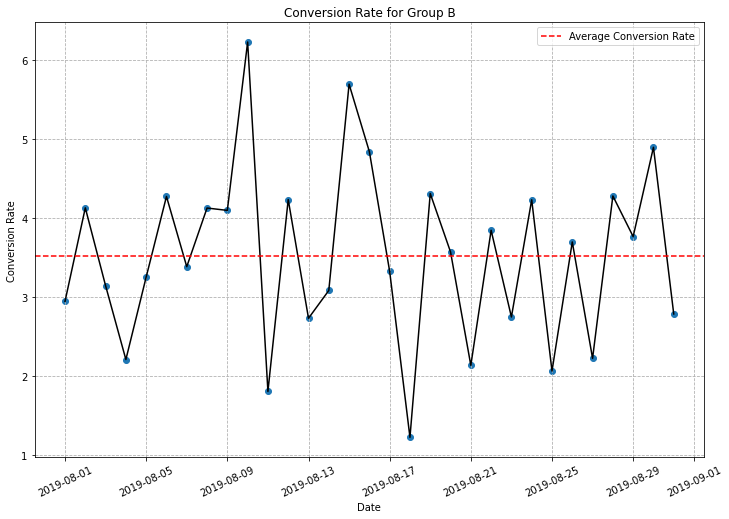

In [107]:
# plotting conversion rate for group B

plt.figure(figsize=(12, 8))
plt.scatter(revenue_visits_groupB['date'], revenue_visits_groupB['conversion_rate'], marker='o')
plt.plot(revenue_visits_groupB['date'], revenue_visits_groupB['conversion_rate'], color='black', markersize=2)
plt.axhline(y=average_conversion_rate_groupB, color='red', linestyle='--', label='Average Conversion Rate')
plt.legend()
plt.title('Conversion Rate for Group B')
plt.ylabel('Conversion Rate')
plt.xlabel('Date')
plt.grid(True, linestyle='--', alpha=1)
plt.xticks(rotation=25)
plt.show()

    We see above the highest conversion rate on 10th of August at 6.23 and the lowest on 18th of August at 1.22. We have a similar effect as seen on Group A.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

A taxa de conversão por grupo foi apresentada corretamente.
   
</div>

#### 5. Faça um gráfico da diferença relativa na conversão cumulativa para o grupo B em comparação com o grupo A. Tire conclusões e crie conjecturas.

In [111]:
((average_conversion_rate_groupA - average_conversion_rate_groupB) / average_conversion_rate_groupA)*100

-15.030023762805827

In [112]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


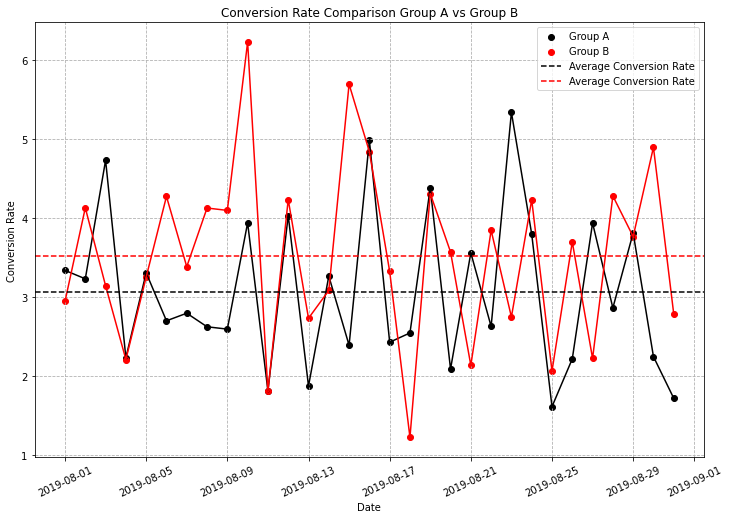

In [113]:
# plotting conversion rate comparison group A and B

plt.figure(figsize=(12, 8))
plt.scatter(revenue_visits_groupA['date'], revenue_visits_groupA['conversion_rate'], label='Group A', color='black', marker ='o', linewidth=1)
plt.scatter(revenue_visits_groupB['date'], revenue_visits_groupB['conversion_rate'], label='Group B', color='red', marker='o',linewidth=1)
plt.plot(revenue_visits_groupA['date'], revenue_visits_groupA['conversion_rate'], color='black', marker='o', markersize=1)
plt.plot(revenue_visits_groupB['date'], revenue_visits_groupB['conversion_rate'], color='red',marker='o',markersize=1)
plt.axhline(y=average_conversion_rate_groupA, color='black', linestyle='--', label='Average Conversion Rate')
plt.axhline(y=average_conversion_rate_groupB, color='red', linestyle='--', label='Average Conversion Rate')
plt.title('Conversion Rate Comparison Group A vs Group B')
plt.ylabel('Conversion Rate')
plt.xlabel('Date')
plt.grid(True, linestyle='--', alpha=1)
plt.xticks(rotation=25)
plt.legend()
plt.show()

    when plotting both groups conversion rate into the same graphic we can see higher conversion rater to group B but also the lowest one. We plotted the average conversion rates and we find group B average 15% above group A.

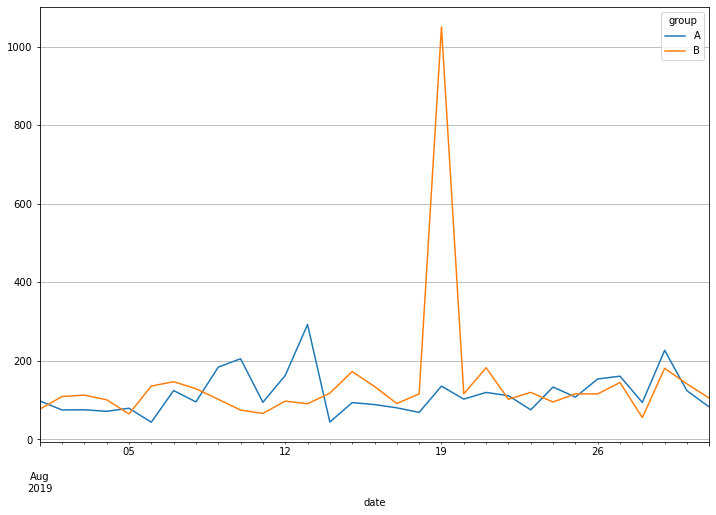

In [115]:
# plotting revenue in august

grouped_visits_aug = pd.pivot_table(orders,index ='date', columns='group', values='revenue').plot(figsize=(12,8),grid='yes')

     When looking the revenue between group A and B we see a spike on the 19th and a variation between the groups on revenue which could explain the curious conversion rate of one group going up and the other one going down between the 18th and 25 of August.
    
    

In [117]:
# adding column 'conversion' to cumulativeData 

cumulativeData['conversion'] = (cumulativeData['orders'] / cumulativeData['visitors'])

In [118]:
# filtering by group A

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']

In [119]:
# filtering by group B

cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

In [120]:
#merging cumulative conversions

mergedCumulativeConversions = cumulativeDataA[['date', 'conversion']].merge(cumulativeDataB[['date', 'conversion']], left_on='date', right_on='date', how='left', suffixes=['A','B'])

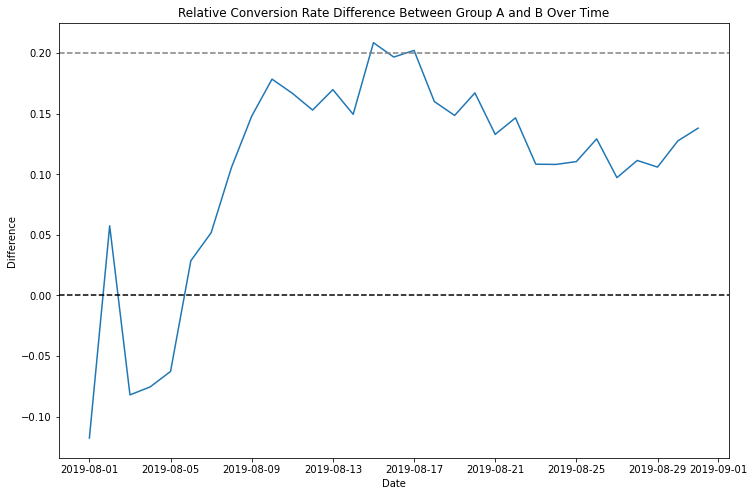

In [121]:
# plotting merged convertsions rate difference

plt.figure(figsize=(12,8))
plt.plot(mergedCumulativeConversions['date'],
         mergedCumulativeConversions['conversionB'] / mergedCumulativeConversions['conversionA'] - 1)
plt.title('Relative Conversion Rate Difference Between Group A and B Over Time')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.show()


    group B had a spike on 2nd of August and went down again until the 6th of August and took the lead up til the end of the experiment. They were not stable and we should look into outliers as they could change the results.

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Por quê? Crie conjecturas.
> Its curious between 18th of August and 25th of August as one conversion rate is higher the other one goes down
   
</div>

#### 6. Calcule os percentis 95 e 99 para o número de pedidos por usuário. Defina o ponto em que um ponto de dados se torna uma anomalia.

In [124]:
# grouping transactions per user

orders_user = orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId' : 'size'})

In [125]:
orders_user['transactionId'].unique()

array([1, 4, 2, 3, 5, 7])

In [126]:
# calculating percentile

np.percentile(orders_user['transactionId'], [90,95,99])

array([1.  , 2.  , 3.98])

    I would define an anomaly at percentile 99 due to its statistical significance

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Por quê? Use referências para embasar sua escolha.
   
</div>

#### 7. Faça um gráfico de dispersão dos preços dos pedidos. Tire conclusões e crie conjecturas.

In [130]:
orders['revenue'].describe()

count     1197.000000
mean       131.491646
std        603.004729
min          5.000000
25%         20.800000
50%         50.200000
75%        130.400000
max      19920.400000
Name: revenue, dtype: float64

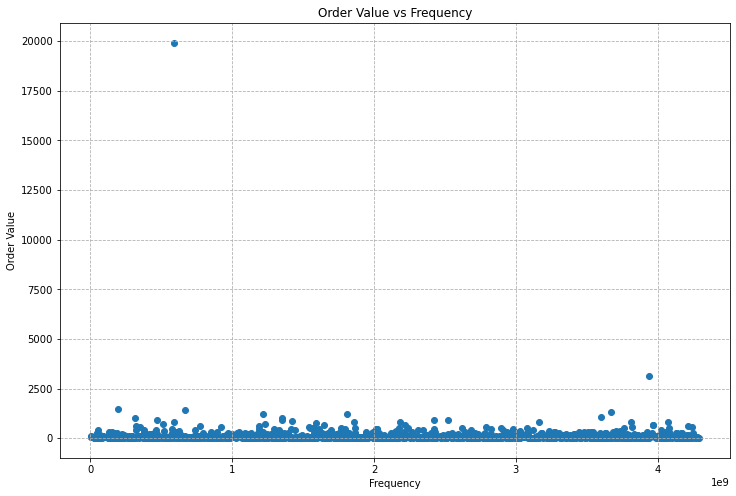

In [131]:
# # plotting revenue size vs frequency graphic

plt.figure(figsize=(12,8))
plt.scatter(orders['transactionId'], orders['revenue'])
plt.title('Order Value vs Frequency')
plt.xlabel('Frequency')
plt.ylabel('Order Value')
plt.grid(True, linestyle='--', alpha=1)
plt.show()

    Two values stands out there one almost at 20000 value and another one at almost 3000. We see 75% of the order value staying under €130.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O gráfico de dispersão foi criado corretamente.
   
</div>

#### 8. Calcule os percentis 95 e 99 dos preços dos pedidos. Defina o ponto em que um ponto de dados se torna uma anomalia.

In [135]:
np.percentile(orders['revenue'], [90, 95, 99]) 

array([282.48 , 435.54 , 900.904])

    I would define the anomaly at percentile 99 due to values significant higher than others

#### 9. Encontre a significância estatística da diferença na conversão entre os grupos usando os dados brutos. Tire conclusões e crie conjecturas.

Null Hypothesis (H0): There is no significant difference in conversion between the groups.

Alternative Hypothesis (H1): There is a significant difference in conversion between the groups.

In [139]:
# setting alpha

alpha = 0.05

In [140]:
# grouping orders from group A

orders_groupA = (orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique}))

In [141]:
# renamining group A columns

orders_groupA.columns = ['visitorId', 'orders']

In [142]:
orders_groupA.head()

,visitorId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [143]:
# grouping orders from group B

orders_groupB = (orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))

In [144]:
# renaming group B columns

orders_groupB.columns = ['visitorId', 'orders']

In [145]:
orders_groupB.head()

,visitorId,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


In [146]:
# creating sample A with raw data

sampleA_orders_raw = pd.concat([orders_groupA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(orders_groupA['orders'])), name='orders')],axis=0)

In [147]:
# creating sample B with raw data

sampleB_orders_raw = pd.concat([orders_groupB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(orders_groupB['orders'])), name='orders')],axis=0)

In [148]:
# applying mann-whitney-u statistical criteria 

pvalue_raw = (stats.mannwhitneyu(sampleA_orders_raw, sampleB_orders_raw)[1])
pvalue_raw

0.016792355056752608

In [149]:
# test result

if pvalue_raw < alpha:
    print('Reject null hypotesis')
else:
    print(" We can't reject null hypotesis")

Reject null hypotesis


In [150]:
# conversion gain relative to group B

conversarion_gain_to_groupB = (sampleB_orders_raw.mean()/sampleA_orders_raw.mean()-1)
conversarion_gain_to_groupB

0.13807884655320146

    The test results show that there is a significant difference between the groups conversion rate when using raw data.

#### 10. Encontre a significância estatística da diferença no tamanho médio do pedido entre os grupos usando os dados brutos. Tire conclusões e crie conjecturas.

Null Hypothesis (H0): There is no significant difference in the average revenue size between the groups.

Alternative Hypothesis (H1): There is a significant difference in the average revenue size between the groups.

In [155]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [156]:
# grouping orders from group A

revenue_groupA_series = (orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'revenue' : pd.Series.nunique}))

In [157]:
# renamining group A columns

revenue_groupA_series.columns = ['visitorId', 'revenue']

In [158]:
revenue_groupA_series.head()

,visitorId,revenue
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [159]:
# grouping orders from group B

revenue_groupB_series = (orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'revenue': pd.Series.nunique}))

In [160]:
# renaming group B columns

revenue_groupB_series.columns = ['visitorId', 'revenue']

In [161]:
revenue_groupB_series.head()

,visitorId,revenue
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


In [162]:
# creating sample A with raw data

sampleA_revenue_raw = pd.concat([revenue_groupA_series['revenue'],
        pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(revenue_groupA_series['revenue'])), name='revenue')],axis=0)

In [163]:
# creating sample B with raw data

sampleB_revenue_raw = pd.concat([revenue_groupB_series['revenue'],
        pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(revenue_groupB_series['revenue'])), name='revenue')],axis=0)

In [164]:
# applying mann-whitney-u statistical criteria 

pvalue_revenue_raw = (stats.mannwhitneyu(sampleA_revenue_raw, sampleB_revenue_raw)[1])
pvalue_revenue_raw

0.01682439514298706

In [165]:
# test result

if pvalue_revenue_raw < alpha:
    print('Reject null hypotesis')
else:
    print(" We can't reject null hypotesis")

Reject null hypotesis


In [166]:
# conversion gain relative to group B

conversarion_gain_to_groupB = (sampleB_revenue_raw.mean()/sampleA_revenue_raw.mean()-1)
conversarion_gain_to_groupB

0.1406659729925117

    The test show there is a significant difference in the average revenue size between the groups when using raw data

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Novamente, revise as premissas do teste estatístico que você está utilizando e o uso do argumento `equal_var`.
  
   
</div>

#### 11. Encontre a significância estatística da diferença na conversão entre os grupos usando os dados filtrados.Tire conclusões e crie conjecturas. 

H0: There is no significant difference in conversion rates between the two groups after filtering the data.

H1: There is a significant difference in conversion rates between the two groups after filtering the data.

In [172]:
# setting users with many orders, using percentile 99

usersWithManyOrders = pd.concat([orders_groupA[orders_groupA['orders'] > 4]['visitorId'], orders_groupB[orders_groupB['orders'] > 4]['visitorId']], axis=0)

In [173]:
# setting users with expensive orders, using percentile 99

usersWithExpensiveOrders = orders[orders['revenue'] > 900]['visitorId']

In [174]:
# concatenating user with many orders and expensive orders

abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values())

In [175]:
# concateneting sample A filtered conversion rates

sampleA_conversion_filtered = pd.concat([orders_groupA[np.logical_not(orders_groupA['visitorId'].isin(abnormalUsers))]['orders'],
                pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(orders_groupA['orders'])),name='orders')],axis=0)

In [176]:
# concateneting sample B filtered conversion rates

sampleB_conversion_filtered = pd.concat([orders_groupB[np.logical_not(orders_groupB['visitorId'].isin(abnormalUsers))]['orders'],
                pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(orders_groupB['orders'])),name='orders')],axis=0)

In [177]:
# applying mann-whitney-u statistical criteria 

pvalue_conversion_filtered = (stats.mannwhitneyu(sampleA_conversion_filtered, sampleB_conversion_filtered)[1])
pvalue_conversion_filtered

0.014380135585307981

In [178]:
# test result

if pvalue_conversion_filtered < alpha:
    print('Reject null hypotesis')
else:
    print(" We can't reject null hypotesis")

Reject null hypotesis


In [179]:
conversion_gain_filtered = format(sampleB_conversion_filtered.mean()/sampleA_conversion_filtered.mean()-1)
conversion_gain_filtered

'0.15331306791514754'

    The test results show there is a significant difference in conversion rates between the two groups after filtering the data.

#### 12. Encontre a significância estatística da diferença no tamanho médio do pedido entre os grupos usando os dados filtrados. Tire conclusões e crie conjecturas.

H0: There is no significant difference in the average revenue sizes between the two groups after filtering the data.

H1: There is a significant difference in the average revenue sizes between the two groups after filtering the data.

In [183]:
# concateneting sample A filtered revenue

sampleA_revenue_filtered = pd.concat([revenue_groupA_series[np.logical_not(revenue_groupA_series['visitorId'].isin(abnormalUsers))]['revenue'],
                pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(revenue_groupA_series['revenue'])),name='revenue')],axis=0)

In [337]:
# concateneting sample B filtered revenue

sampleB_revenue_filtered = pd.concat([revenue_groupB_series[np.logical_not(revenue_groupB_series['visitorId'].isin(abnormalUsers))]['revenue'],
                pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(revenue_groupB_series['revenue'])),name='revenue')],axis=0)

In [185]:
# applying mann-whitney-u statistical criteria 

pvalue_revenue_filtered = (stats.mannwhitneyu(sampleA_revenue_filtered, sampleB_revenue_filtered)[1])
pvalue_revenue_filtered

0.014408040905181161

In [186]:
# test result

if pvalue_revenue_filtered < alpha:
    print('Reject null hypotesis')
else:
    print(" We can't reject null hypotesis")

Reject null hypotesis


In [187]:
revenue_gain_filtered = format(sampleB_conversion_filtered.mean()/sampleA_conversion_filtered.mean()-1)
revenue_gain_filtered

'0.15331306791514754'

There is significant difference in the average revenue sizes between the two groups after filtering the data.

    The test result show that there is significant difference in the average revenue sizes between the two groups after filtering the data.

#### 13. Tome uma decisão com base nos resultados do teste. As decisões possíveis são: 1. Pare o teste, considere um dos grupos o líder. 2. Pare o teste, conclua que não há diferença entre os grupos. 3. Continue o teste.

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Aqui você precisa tomar uma decisão com base nos resultados dos testes.   
   
</div>

* There is an statistic significance between groups conversion rates and revenue wether data is raw or filtered

* The graphics show us that Group B has a high conversion rate when compared with group A.

* The graphics also show a higher cumulative revenue from Group B

I would suggest to stop the test and consider it sucessfull.



<div class="alert alert-block alert-danger">
<b> Comentário geral do revisor v1</b> <a class="tocSkip"></a>

Obrigado por enviar o seu projeto e pelo esforço de chegar até aqui. O seu projeto possui alguns pontos bem interessantes, dos quais eu destaco:
    
- Código bem simples e estruturado
- Comentários sucintos e bem objetivos
- Análises bem detalhadas em cada etapa do projeto
    
<br>
    
Entretanto, deixei alguns comentários em alguns trechos que precisam de ajuste. Precisamos fazer essas alterações para avançarmos. Lembre-se que os comentários em amarelo são sugestões de melhoria.
 
<br>
    
Qualquer dúvida, pode contar comigo.   
    
    
**Até breve!**

</div>
